In [5]:
# Importing required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime, os
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
# Loading dataframes
train_path = r"D:\Semester3\Ishant\Final\orignal bone dataset\boneage-training-dataset.csv"
test_path=r"D:\Semester3\Ishant\Final\orignal bone dataset\boneage-test-dataset.csv"

train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)

In [8]:
# First five rows of the train dataset
train_df.head()

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False


In [9]:
test_df.head()

,Case ID,Gender
0,4360,M
1,4361,M
2,4362,M
3,4363,M
4,4364,M


In [10]:
# dimension of the dataframe
train_df.shape

(12611, 3)

In [11]:
# concise summary of the dataset 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12611 entries, 0 to 12610
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       12611 non-null  int64
 1   boneage  12611 non-null  int64
 2   male     12611 non-null  bool 
dtypes: bool(1), int64(2)
memory usage: 209.5 KB


In [12]:
'''
right now we have a male column of boolean type that shows whether the child is male or not.
In place of this coulmn, we are creating a new column called gender to specify gender either as a male or a female.
'''
train_df['gender'] = train_df['male'].apply(lambda x: 'male' if x else 'female')
print(train_df['gender'].value_counts())

gender
male      6833
female    5778
Name: count, dtype: int64


In [13]:
train_df.head()

,id,boneage,male,gender
0,1377,180,False,female
1,1378,12,False,female
2,1379,94,False,female
3,1380,120,True,male
4,1381,82,False,female


In [14]:
# checking if we have any null values in the dataset
train_df.isnull().values.any()

False

C:\Users\20rew\AppData\Local\Temp\ipykernel_51424\2705614393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = train_df['gender'], palette='viridis')


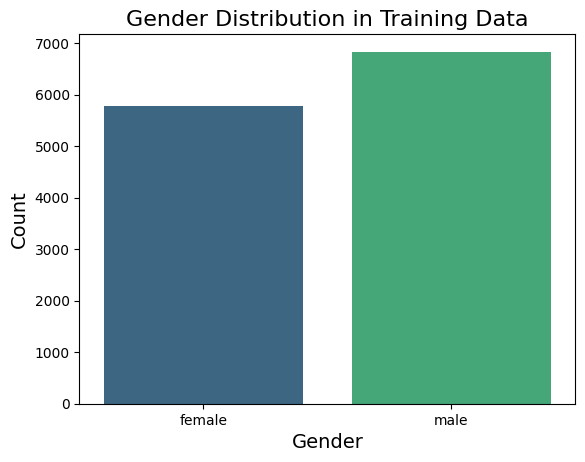

In [15]:
# Visualizing the number of male and female children in the dataset
sns.countplot(x = train_df['gender'], palette='viridis')
plt.title('Gender Distribution in Training Data', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [16]:
# STATISTICAL SUMMARY OF THE DATASET

#oldest child in the dataset
print('MAX age: ' + str(train_df['boneage'].max()) + ' months')

#youngest child in the dataset
print('MIN age: ' + str(train_df['boneage'].min()) + ' months')

#mean age is
mean_bone_age = train_df['boneage'].mean()
print('mean: ' + str(mean_bone_age))

#median bone age
print('median: ' +str(train_df['boneage'].median()))

#standard deviation of boneage
std_bone_age = train_df['boneage'].std()

#models perform better when features are normalised to have zero mean and unity standard deviation
#using z score for the training
train_df['bone_age_z'] = (train_df['boneage'] - mean_bone_age)/(std_bone_age)
print("\n Important Parameters")
print(mean_bone_age)
print(std_bone_age)

MAX age: 228 months
MIN age: 1 months
mean: 127.3207517246848
median: 132.0

 Important Parameters
127.3207517246848
41.182021399396326


In [17]:
train_df.head()

,id,boneage,male,gender,bone_age_z
0,1377,180,False,female,1.279181
1,1378,12,False,female,-2.800269
2,1379,94,False,female,-0.809109
3,1380,120,True,male,-0.177766
4,1381,82,False,female,-1.100498


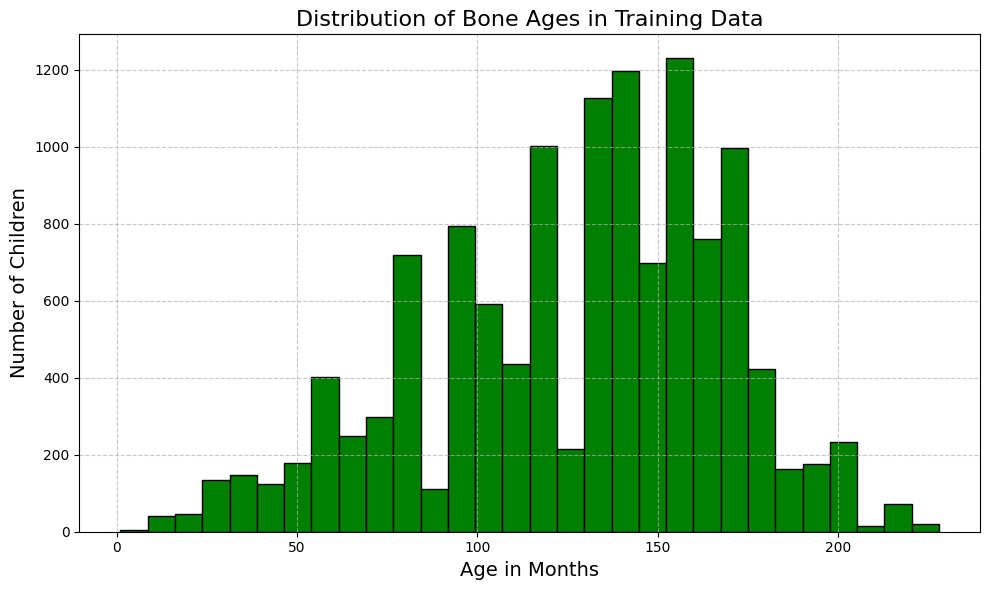

In [18]:
#plotting a histogram for bone ages

plt.figure(figsize=(10, 6)) 
plt.hist(train_df['boneage'], bins=30, color='green', edgecolor='black') 

plt.xlabel('Age in Months', fontsize=14)
plt.ylabel('Number of Children', fontsize=14)
plt.title('Distribution of Bone Ages in Training Data', fontsize=16)

# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()  
plt.show()

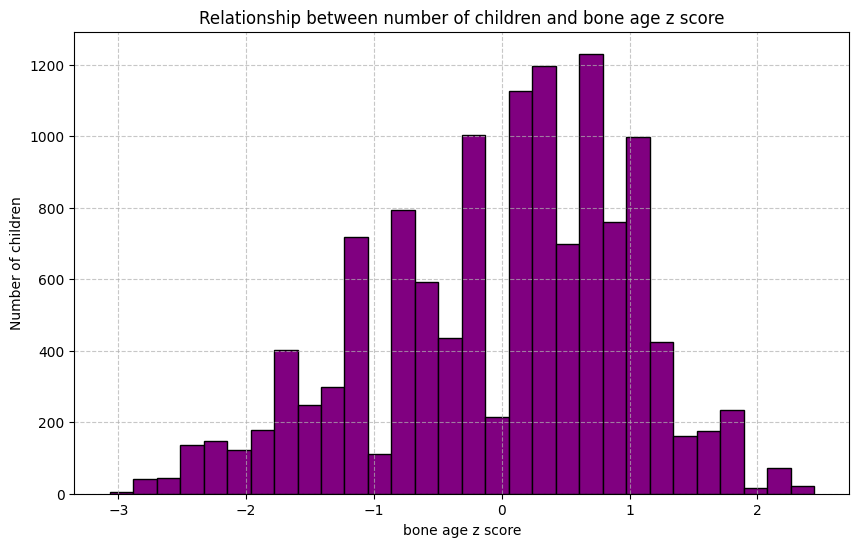

In [19]:
# Histogram to visualise relationship between no. of children and bone age z score
plt.figure(figsize=(10, 6)) 
plt.hist(train_df['bone_age_z'], bins=30, color='purple', edgecolor='black') 

plt.xlabel('bone age z score')
plt.ylabel('Number of children')
plt.title('Relationship between number of children and bone age z score')
plt.grid(True, linestyle='--', alpha=0.7)

In [21]:
#Relationship between age and gender with a categorical scatter plot (swarmplot)

'''plt.figure(figsize=(10, 6))  
sns.swarmplot(x='gender', y='boneage', data=train_df, palette='Set2', size=6, alpha=0.8)

plt.xlabel('Gender', fontsize=14)
plt.ylabel('Bone Age (months)', fontsize=14)
plt.title('Relationship Between Gender and Bone Age', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()'''

"plt.figure(figsize=(10, 6))  \nsns.swarmplot(x='gender', y='boneage', data=train_df, palette='Set2', size=6, alpha=0.8)\n\nplt.xlabel('Gender', fontsize=14)\nplt.ylabel('Bone Age (months)', fontsize=14)\nplt.title('Relationship Between Gender and Bone Age', fontsize=16)\n\nplt.grid(True, linestyle='--', alpha=0.7)\n\nplt.tight_layout()\n\nplt.show()"

Swarmplot is a type of visualization that shows relationship between a categorical and numerical variable. Here, gender is the categorical variable and bone age (in months) is the numerical variable. We could not use normal scatterplots because they are designed to show relationship between two numerical variables. Scatterplots might not fully convey the patterns or distributions and the points can overlap or be less informative. 

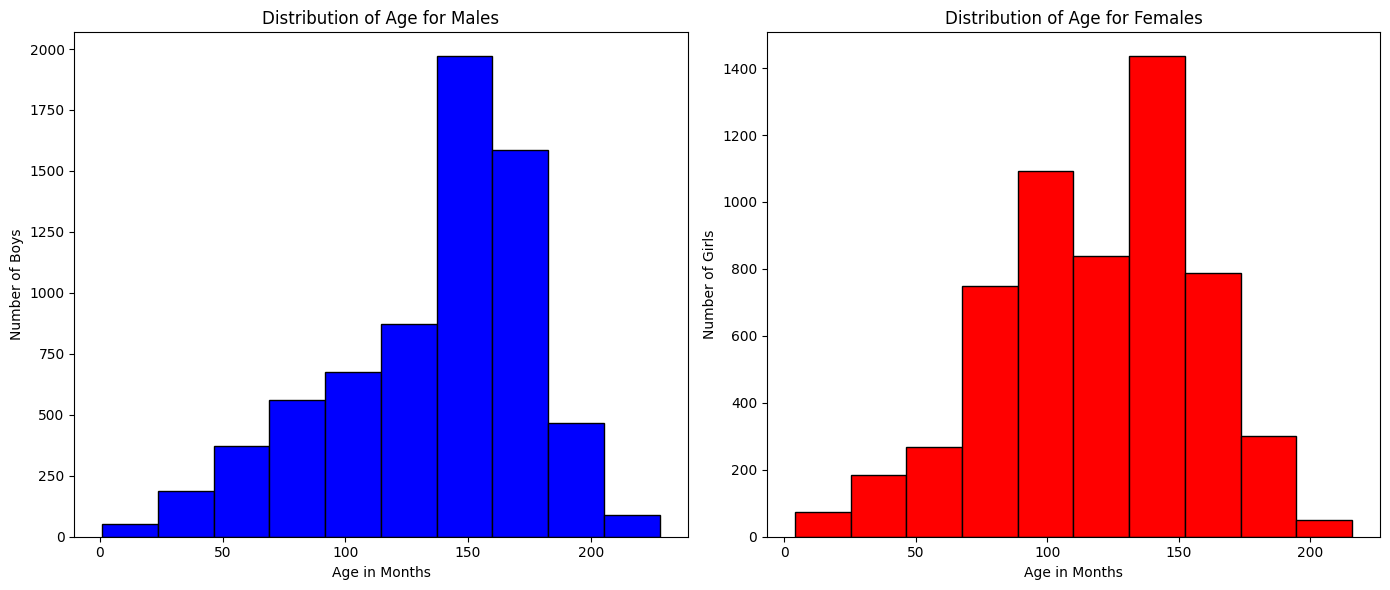

In [23]:
# Filtering the DataFrame based on gender
male = train_df[train_df['gender'].str.lower() == 'male']
female = train_df[train_df['gender'].str.lower() == 'female']

fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Histogram for males
ax[0].hist(male['boneage'], color='blue', edgecolor='black')
ax[0].set_title('Distribution of Age for Males')
ax[0].set_ylabel('Number of Boys')
ax[0].set_xlabel('Age in Months')

# Histogram for females
ax[1].hist(female['boneage'], color='red', edgecolor='black')
ax[1].set_title('Distribution of Age for Females')
ax[1].set_ylabel('Number of Girls')
ax[1].set_xlabel('Age in Months')

plt.tight_layout()

plt.show()

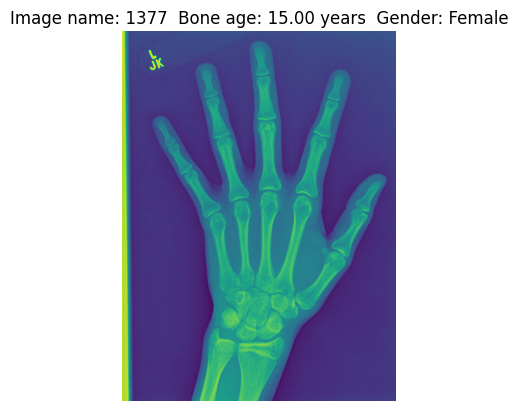

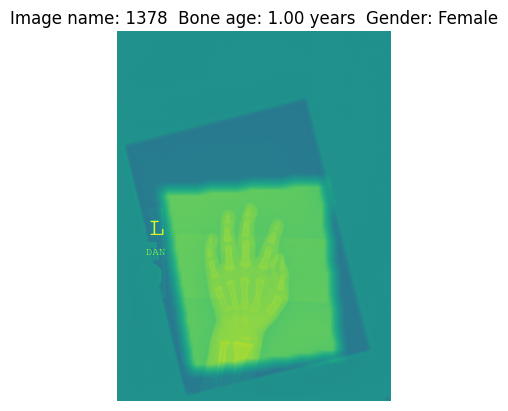

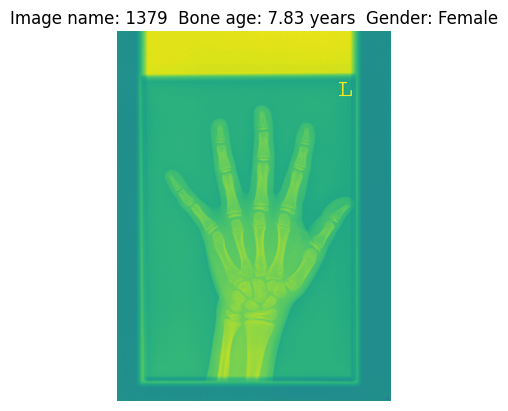

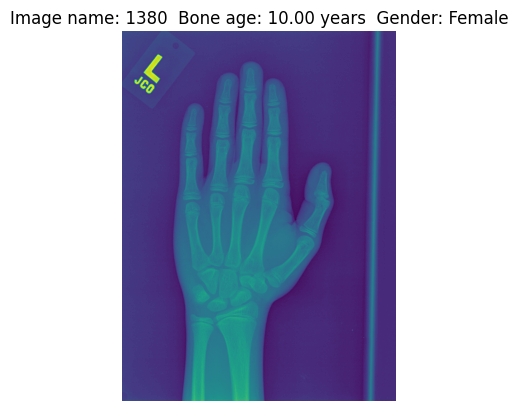

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Looping over the top 4 rows of the DataFrame
for filename, boneage, gender in train_df[['id','boneage','gender']].head(4).values:
    # Construct the full file path
    image_folder=r"D:\Semester3\Ishant\Final\orignal bone dataset\boneage-training-dataset\boneage-training-dataset"
    file_path = os.path.join(image_folder, f'{filename}.png')
    
    # Check if the file exists before trying to load it
    if os.path.exists(file_path):
        # Read the image
        img = mpimg.imread(file_path)
        
        # Display the image
        plt.imshow(img)
        plt.title(f'Image name: {filename}  Bone age: {boneage/12:.2f} years  Gender: {"Male" if gender == 1 else "Female"}')
        plt.axis('off')
        plt.show()
    else:
        print(f"File not found: {file_path}")

In [30]:
train_df.head()

,id,boneage,male,gender,bone_age_z
0,1377,180,False,female,1.279181
1,1378,12,False,female,-2.800269
2,1379,94,False,female,-0.809109
3,1380,120,True,male,-0.177766
4,1381,82,False,female,-1.100498
